In [2]:
import pandas as pd
comm_sig = pd.read_excel("sigma_compiled_sanitized_20230108.xlsx")
print(len(comm_sig))

399350


In [3]:
import numpy as np
from rdkit import Chem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')                                                                                                 

substructs = ["[c,n,o][OH:3]", "[C,N,O][OH!$(C(=O)):3]", \
              "[c,n,o][NH2:3]", "[C,N,O][NH2:3]", \
              "[c,n,o][C:3](=O)[O]", "[C,N,O][C:3](=O)[O]", \
              "[c,n,o][Cl:3]", "[C,N,O][Cl:3]", \
              "[c,n,o][Br:3]", "[C,N,O][Br:3]", \
              "[c,n,o][I:3]", "[C,N,O][I:3]", \
              "[c,n,o][B:3](O)[O]", "[C,N,O][B:3](O)[O]", 
              "[C](=[O])[CX4H2,CX4H1,CX4H3:3]", "[a][CX4H2,CX4H1,CX4H3:3]", "[N,O,S][CX4H2,CX4H1,CX4H3:3]"]

bb_classes = ["aryl alcohol", "alcohol",
              "aryl amine", "amine",
              "aryl acid", "acid", 
              "aryl chloride", "chloride",
              "aryl bromide", "bromide", 
              "aryl iodide", "iodide", 
              "aryl boronate", "boronate", 
              "carbonyl–CH", "benzyl–H", "het–CH"]
all_hits = np.zeros(len(bb_classes))

for i,k in comm_sig.iterrows():
    mol = Chem.MolFromSmiles(k["sanitized_smiles"])
    
    for i2,k2 in enumerate(substructs):
        sub = Chem.MolFromSmarts(k2)
        hits = mol.GetSubstructMatches(sub)
        if bb_classes[i2] == "carbonyl-CH":
            hits = hits + mol.GetSubstructMatches(Chem.MolFromSmarts("[C]([OX2H1])[CX4H2,CX4H1,CX4H3:3]"))
        if len(hits) > 0:
            all_hits[i2] = all_hits[i2] + 1

In [4]:
bb_mapping = {}
hits_bb = []
for i,k in enumerate(all_hits):
    print(bb_classes[i], int(k))
    hits_bb.append((int(k), bb_classes[i]))
    bb_mapping[bb_classes[i]] = int(k)

aryl alcohol 24749
alcohol 96486
aryl amine 38573
amine 47641
aryl acid 47703
acid 87030
aryl chloride 53032
chloride 11476
aryl bromide 43428
bromide 7147
aryl iodide 7447
iodide 936
aryl boronate 18093
boronate 1068
carbonyl–CH 92788
benzyl–H 180178
het–CH 254901


In [5]:
sorted_list = sorted(hits_bb, key=lambda x: x[0], reverse=False)
for k in sorted_list:
    print(k)

(936, 'iodide')
(1068, 'boronate')
(7147, 'bromide')
(7447, 'aryl iodide')
(11476, 'chloride')
(18093, 'aryl boronate')
(24749, 'aryl alcohol')
(38573, 'aryl amine')
(43428, 'aryl bromide')
(47641, 'amine')
(47703, 'aryl acid')
(53032, 'aryl chloride')
(87030, 'acid')
(92788, 'carbonyl–CH')
(96486, 'alcohol')
(180178, 'benzyl–H')
(254901, 'het–CH')


In [6]:
all_bbs = [ # aryl ,alkyl
    ("boronate", 18093, 1068),
    ("iodide", 7447, 936),
    ("bromide", 43428, 7147),
    ("chloride", 53032, 11476),
    ("amine", 38573, 47641),
    ("alcohol", 24749, 96486),
    ("acid", 47703, 87030),
    ("carbonyl–CH", 0, 112554),
    ("benzyl–H", 0, 180178),
    ("het–CH", 0, 254901),
]

coz = ["#cac9c9", "#cac9c9", "#cac9c9", "#cac9c9", "#cac9c9", "#cac9c9", "#cac9c9", "#000000", "#000000", "#000000"]

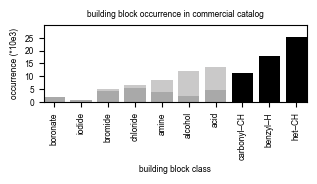

In [7]:
import matplotlib.pyplot as plt

labels, aryl_vals, alkyl_vals = zip(*all_bbs)

fig, ax = plt.subplots(figsize=(3.4,1))


# Define bar width
bar_width = 0.5

bars1 = ax.bar(labels, aryl_vals, color='darkgrey', linewidth=bar_width, label='Aryl')

bars2 = ax.bar(labels, alkyl_vals, bottom=aryl_vals, color=coz, linewidth=bar_width, label='Non-aryl')


ax.set_ylabel("occurrence (*10e3)", fontsize=6, fontfamily='arial')
ax.set_xlabel("building block class", fontsize=6, fontfamily='arial')
ax.set_title("building block occurrence in commercial catalog", fontsize=6, fontfamily='arial')

ax.set_xticks(range(0,len(labels)))
ax.set_xticklabels(labels, fontsize=6, fontfamily='arial', rotation=90)
ax.set_yticks([0, 50000, 100000, 150000, 200000, 250000])
ax.set_yticklabels([0, "5", "10", "15", "20", "25"], fontsize=6, fontfamily='arial')
ax.set_ylim([0,300000])

plt.subplots_adjust(hspace=0, wspace=0)
plt.margins(0,0)

plt.savefig(f"component_b.png", dpi=900, bbox_inches='tight', pad_inches = 0.01)